##### Import the needed libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
from IPython.display import Markdown, display
import gc

In [4]:
%matplotlib inline

In [37]:
def printmd(string):
    display(Markdown(string))

#### Load Data

In [5]:
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [43]:
printmd('**The shape of all the input files :-**')
printmd(f'The order_products_train size is :\n{order_products_train.shape}')
printmd(f'The order_products_prior size is :\n{order_products_prior.shape}')
printmd(f'The orders size is :\n{orders.shape}')
printmd(f'The products size is :\n{products.shape}')
printmd(f'The aisles size is :\n{aisles.shape}')
printmd(f'The departments size is :\n{departments.shape}')

**The shape of all the input files :-**

The order_products_train size is :
(1384617, 4)

The order_products_prior size is :
(32434489, 4)

The orders size is :
(3421083, 7)

The products size is :
(49688, 4)

The aisles size is :
(134, 2)

The departments size is :
(21, 2)

In [44]:
order_products_train.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [40]:
order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


#### Concatenate the Orders_products_train and Order_products_prior table as both contains purchased products order of customers

In [42]:
order_products_all = pd.concat([order_products_train, order_products_prior], axis=0)
print("The order_products_all size is : ", order_products_all.shape)

The order_products_all size is :  (33819106, 4)


In [52]:
order_products_all.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [76]:
grouped = order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()


In [78]:
grouped.head(10)

,order_id,add_to_cart_order
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26
5,6,3
6,7,2
7,8,1
8,9,15
9,10,15


In [70]:
grouped = grouped.add_to_cart_order.value_counts()

In [75]:
grouped.head()

5      237225
6      236383
4      230299
7      228547
3      215060
        ...  
112         1
105         1
94          1
90          1
145         1
Name: add_to_cart_order, Length: 113, dtype: int64

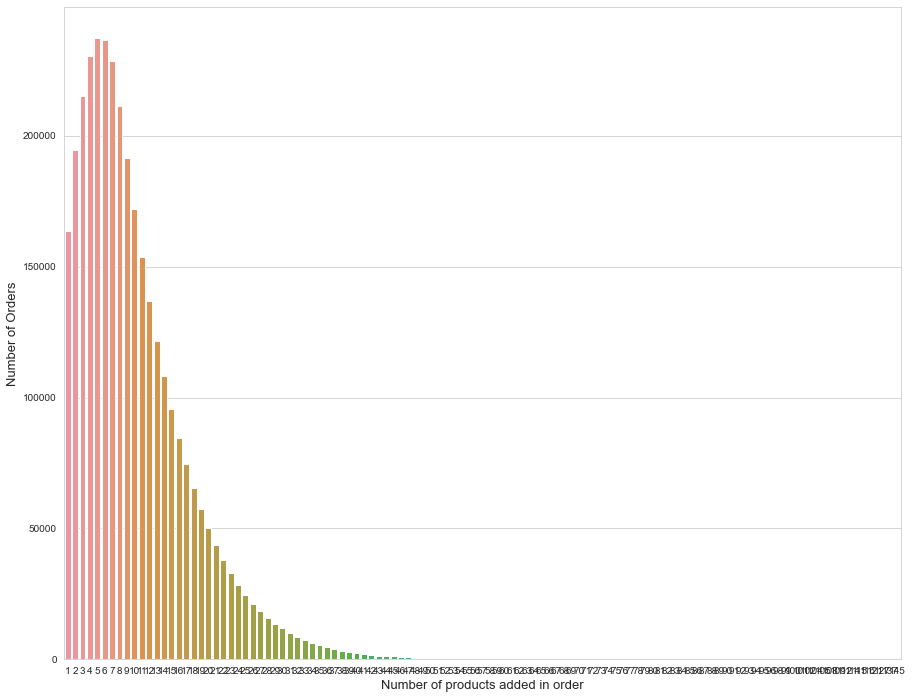

In [74]:
grouped = order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

,product_id,count,product_name
36230,36233,1,Water With Electrolytes
11251,11254,1,Drink Distinct All Natural Soda Pineapple Coco...
43095,43098,1,Buddy Bear Probiotic Orange Flavor Chewable
14482,14485,1,Organic Ice Cream Birthday Cake
7623,7626,1,Brut Prosecco
49536,49540,1,Pure Squeezed Lemonade
33094,33097,1,Piquillo & Jalapeno Bruschetta
46376,46379,1,Skin Firming Cellulite Gel Cream
5253,5255,1,Chardonnay Carneros
35887,35890,1,Petite Black Eyed Peas


In [85]:
grouped = order_products_all.groupby("product_id")["reordered"].aggregate({'count'}).reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='count', ascending=True)[:10]
grouped

,product_id,count,product_name
36230,36233,1,Water With Electrolytes
11251,11254,1,Drink Distinct All Natural Soda Pineapple Coco...
43095,43098,1,Buddy Bear Probiotic Orange Flavor Chewable
14482,14485,1,Organic Ice Cream Birthday Cake
7623,7626,1,Brut Prosecco
49536,49540,1,Pure Squeezed Lemonade
33094,33097,1,Piquillo & Jalapeno Bruschetta
46376,46379,1,Skin Firming Cellulite Gel Cream
5253,5255,1,Chardonnay Carneros
35887,35890,1,Petite Black Eyed Peas


In [98]:
grouped = order_products_train.groupby("product_id")["reordered"].aggregate({'count'}).reset_index()
grouped

,product_id,count
0,1,76
1,2,4
2,3,6
3,4,22
4,5,1
...,...,...
39118,49682,5
39119,49683,2413
39120,49686,7
39121,49687,1


In [95]:
gc.collect()

23722